# Linear models
* Linear regression
* Ridge
* Lasso
* LAD regression
* Huber regression

In [1]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
from training.creating_dataset import load_and_preprocess_data
from training.constants import FEATURES, DATASET_FILES, ORDERED_CHARACTERISTICS_FULL


bestiaries = load_and_preprocess_data(
    [f"../../pathfinder_2e_remaster_data/{f}" for f in DATASET_FILES], FEATURES
)

In [2]:
bestiaries.head()

,level,book,str,dex,con,int,wis,cha,ac,hp,...,poison_resistance,slashing_resistance,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness
0,8,Pathfinder #164: Hands of the Devil,5.0,5.0,3.0,-2.0,3.0,4.0,28.0,152,...,0,0,0,0,0,0,0,0,0,0
1,5,Pathfinder #163: Ruins of Gauntlight,5.0,2.0,4.0,4.0,2.0,2.0,22.0,75,...,0,0,0,0,0,0,0,0,0,0
2,3,Pathfinder #163: Ruins of Gauntlight,4.0,3.0,1.0,1.0,3.0,1.0,18.0,48,...,0,0,0,0,0,0,0,0,0,0
3,3,Pathfinder #164: Hands of the Devil,1.0,4.0,1.0,0.0,3.0,1.0,20.0,30,...,5,0,0,0,0,0,0,0,0,0
4,8,Pathfinder #164: Hands of the Devil,5.0,5.0,5.0,2.0,4.0,5.0,27.0,120,...,10,0,0,0,0,0,0,0,0,0


In [3]:
bestiaries.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3833 entries, 0 to 4506
Data columns (total 52 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   level                   3833 non-null   int64  
 1   book                    3833 non-null   object 
 2   str                     3833 non-null   float64
 3   dex                     3833 non-null   float64
 4   con                     3833 non-null   float64
 5   int                     3833 non-null   float64
 6   wis                     3833 non-null   float64
 7   cha                     3833 non-null   float64
 8   ac                      3833 non-null   float64
 9   hp                      3833 non-null   int32  
 10  perception              3833 non-null   float64
 11  fortitude               3833 non-null   float64
 12  reflex                  3833 non-null   float64
 13  will                    3833 non-null   float64
 14  focus                   3833 non-null   

In [4]:
columns = [col for col in bestiaries.columns if col not in ["book", "level"]]
scaler = MinMaxScaler()
min_max_df = pd.DataFrame()
min_max_df[columns] = pd.DataFrame(
    scaler.fit_transform(bestiaries[columns]), index=bestiaries.index
)
min_max_df["book"] = bestiaries["book"]
min_max_df["level"] = bestiaries["level"]
bestiaries = min_max_df
bestiaries = bestiaries[ORDERED_CHARACTERISTICS_FULL + ["book", "level"]]
bestiaries.head()

,str,dex,con,int,wis,cha,ac,hp,perception,fortitude,...,area-damage_weakness,cold_weakness,cold-iron_weakness,evil_weakness,fire_weakness,good_weakness,slashing_weakness,splash-damage_weakness,book,level
0,0.588235,0.588235,0.357143,0.200000,0.470588,0.529412,0.509434,0.252087,0.156522,0.425532,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8
1,0.588235,0.411765,0.428571,0.600000,0.411765,0.411765,0.396226,0.123539,0.130435,0.297872,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,5
2,0.529412,0.470588,0.214286,0.400000,0.470588,0.352941,0.320755,0.078464,0.069565,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #163: Ruins of Gauntlight,3
3,0.352941,0.529412,0.214286,0.333333,0.470588,0.352941,0.358491,0.048414,0.104348,0.170213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,3
4,0.588235,0.588235,0.500000,0.466667,0.529412,0.588235,0.490566,0.198664,0.156522,0.361702,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pathfinder #164: Hands of the Devil,8


In [6]:
import os
from training.splitting_dataset import split_dataframe

os.chdir("../../training")
X_train, X_test, y_train, y_test = split_dataframe(bestiaries)
os.chdir("../notebooks/models")

In [7]:
from training.train_and_evaluate_models import train_and_evaluate_models


results = train_and_evaluate_models(
    [
        "linear_regression",
        "linear_regression_ridge",
        "linear_regression_lasso",
        "lad_regression",
    ],
    X_train,
    y_train,
    X_test,
    y_test,
)  # przeskalować

==== linear_regression ====
	--> train
		--> rmse: 0.5387515246197611
		--> mse: 0.29025320528011705
		--> mae: 0.3667926904064503
	--> test
		--> rmse: 0.6829592716669326
		--> mse: 0.466433366755827
		--> mae: 0.4548709847244374

==== linear_regression_ridge ====
	--> train
		--> rmse: 0.5388176190538035
		--> mse: 0.29032442660280977
		--> mae: 0.3662713633094879
	--> test
		--> rmse: 0.6785547581491751
		--> mse: 0.46043655980688547
		--> mae: 0.4538221088098472

==== linear_regression_lasso ====
	--> train
		--> rmse: 0.5470208604799994
		--> mse: 0.299231821800279
		--> mae: 0.3627516081574562
	--> test
		--> rmse: 0.6643645845460687
		--> mse: 0.4413803011990705
		--> mae: 0.45266562773502517

Fitting 5 folds for each of 100 candidates, totalling 500 fits
==== lad_regression ====
	--> train
		--> rmse: 0.5728900317041671
		--> mse: 0.3282029884260016
		--> mae: 0.35522080691375796
	--> test
		--> rmse: 0.654045575092692
		--> mse: 0.4277756142983302
		--> mae: 0.4374267823712459

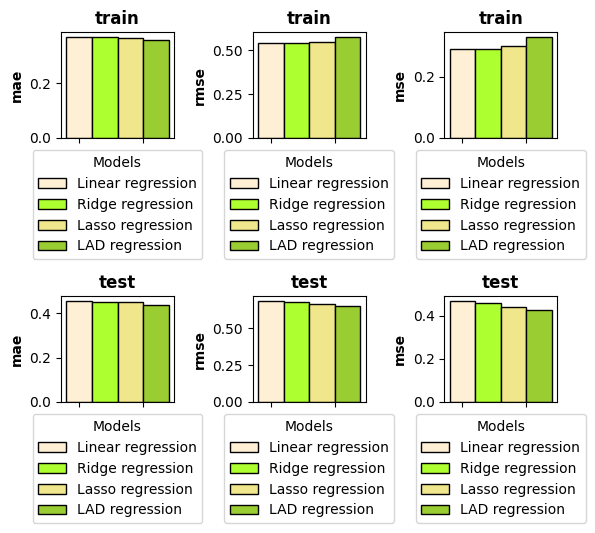

In [8]:
from training.results import plot_results


plot_results(results, measure_types=["mae", "rmse", "mse"])